In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

# 线性关系的可视化

<cite>In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.</cite>


[约翰·图基](https://zh.wikipedia.org/wiki/%E7%BA%A6%E7%BF%B0%C2%B7%E5%9B%BE%E5%9F%BA)（英语：John Tukey，1915年6月16日－2000年7月26日），美国数学家，快速傅里叶变换发明人，同时提出了"比特"、"数据分析"等概念。因开创了探索性数据分析（Exploratory Data Analysis，简称EDA）精神闻名。

EDA的本质是对现有数据在做出尽量少的假设下前提下，通过对数据作图、方程拟合等方法来探索数据的结构与规律。这种方法对于杂乱，不知如何下手处理的数据来说，是一种非常有效的分析方法。

Seaborn也是本着探索数据的精神发展的，通过快速对数据可视化，研究数据的主要模式。如果希望定量的对数据分析，那么可以结合一些其他常用的数据分析库，例如`statsmodel`。

---

### 绘制线性回归模型的函数

Seaborn主要提供了两个函数`regplot()`和`lmplot()`来绘制线性回归模型。

这两个函数的核心功能很相似，两个函数都会绘制数据散点图，并且拟合关于变量$x$、$y$之间的回归曲线，同时显示回归的95%置信区间。

本节的主要目的是带领大家发掘两个函数的区别，以此在实际应用中能够快速选择合适的函数。

In [2]:
# 载入数据集
tips = sns.load_dataset('tips')

绘制顾客消费总额和小费数额两个变量之间的关系：

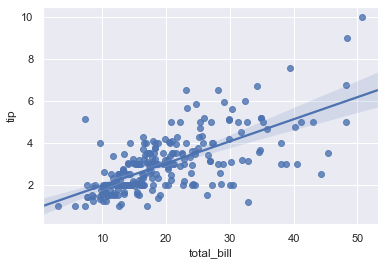

In [3]:
sns.regplot(x='total_bill', y='tip', data=tips);

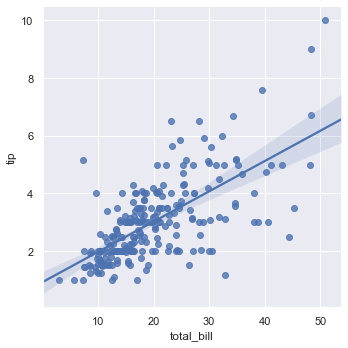

In [4]:
sns.lmplot(x='total_bill', y='tip', data=tips);

不难发现，除了形状不太相同，两个图像非常接近。

现在介绍两个函数之间的一个主要区别： `regplot()`: 接受变量$x,y$的类型可以是numpy数组、pandas序列(Series)。或者直接对data传入pandas DataFrame对象数据。而`lmplot()`的`data`参数是必须的，且变量$x,y$都必须为字符串。

传入数据的格式被称为["tidy"数据](https://en.wikipedia.org/wiki/Tidy_data)或者"long-term"数据，在统计中称为"model matrix"或"data matrix"，即数据的排列方式为：每个变量为数据集的一列，每次观察都是数据集中的一行。

`regplot()`和`lmplot()`除了可以接受连续型数据，也可接受离散型数据。然而，对于离散型数据，散点图的回归模拟不是很直观：

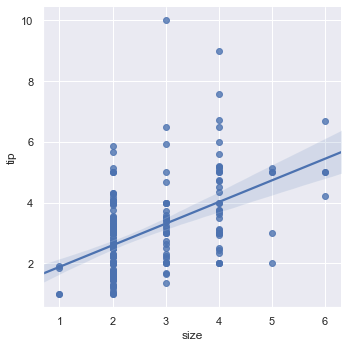

In [5]:
sns.lmplot(x='size', y='tip', data=tips);

可以看到上图中，很多数据点都重合在了一起。为了解决这个问题，可以对离散数据加入一些随机噪声(抖动，jitter),从而使得数据分布更分散：

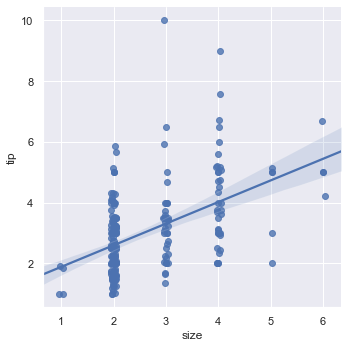

In [6]:
sns.lmplot(x='size', y='tip', data=tips, x_jitter=.05);

或者，我们可以将分散的数据点聚合表示为离散的数据柱，表达数据中集中趋势及估计的置信区间：

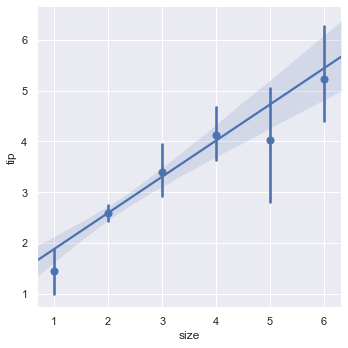

In [9]:
sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean);

---

## 使用其他类型的模型拟合

使用线性回归拟合数据非常容易操作，然而当数据分布比较复杂时，其不能很好的表示数据。

In [10]:
# 载入安斯库姆四重奏数据
anscombe = sns.load_dataset('anscombe')

[安斯库姆四重](https://zh.wikipedia.org/wiki/%E5%AE%89%E6%96%AF%E5%BA%93%E5%A7%86%E5%9B%9B%E9%87%8D%E5%A5%8F)（Anscombe's quartet)是四组基本的统计特性一致（例如均值，方程）的数据，但由它们绘制出的图表则截然不同。

这四组数据由统计学家弗朗西斯·安斯库姆（Francis Anscombe）于1973年构造，用来说明在分析数据前先绘制图表的重要性，以及**离群值**对统计的影响之大。

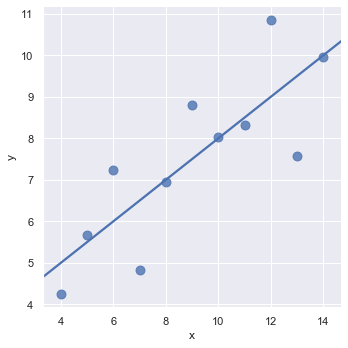

In [15]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'I'"),  
           ci=None, scatter_kws={'s': 80});

上述代码中，我们使用anscombe数据中，拟合为线性的数据。取消`lmplot()`的置信区间，`scatter_kws`用来控制散点图的属性。

现在，我们再来载入另一个数据，看看线性回归的拟合情况：

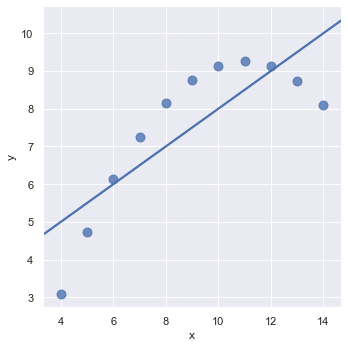

In [16]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={'s': 80});

可以看到，即使两份数据的统计特性一致，但是使用同一模型对数据拟合的效果大不相同，这样凸显了在实际分析中，先将数据可视化观察数据大致模式的重要性。

为了表达上图中二阶甚至更高阶的关系，`lmplot()`和`regplot()`可以拟合多项式回归模型来探索数据的非线性趋势：

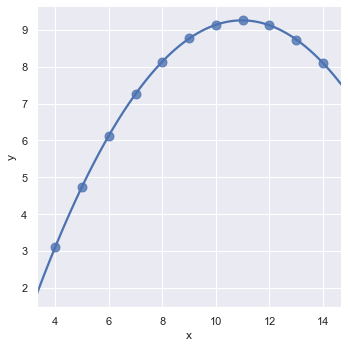

In [17]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={'s': 80});

----

在上面两例中，数据的分布都很正常，可以使用相应的线性或多项式回归完美拟合。然而，当数据中出现[离群值](https://en.wikipedia.org/wiki/Outlier)时，则会对拟合效果造成很大的影响：

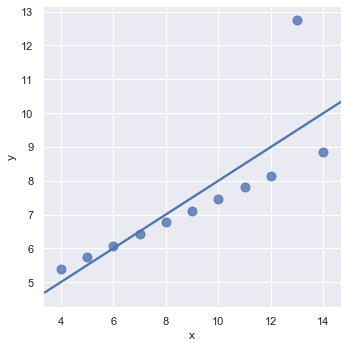

In [18]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={'s': 80});

在上图中，由于一个离群值，造成拟合曲线整体向离群值偏移。这显然不是我们希望的效果，为了解决这个问题，可以采用[稳健回归](https://en.wikipedia.org/wiki/Robust_regression)(（robust regression），通过选择不同的损失函数 (例如加入惩罚项) 来降低离群值与拟合直线之间残差(residual)的权重，从而减少离群值的影响。

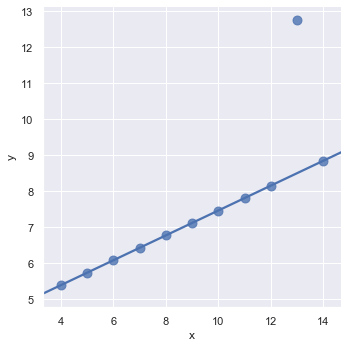

In [19]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={'s': 80});

---

对于两分类数据，使用简单线性回归也能有效，但是其预测效果不是很直观：

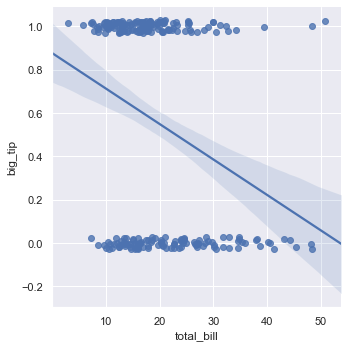

In [20]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

两分类问题，直觉（intuitive）的想法是模型能够返回每个分类相应的概率，从而选择概率较大的一者作为预测类别。逻辑回归 (logistic regression) 很适合这样的问题，其返回值在$[0,1]$之间，可以看作返回每个类别对应的分类概率。我们选择一个阈值，当回归模型返回的概率值大于阈值时，则选择该值对应的类别。

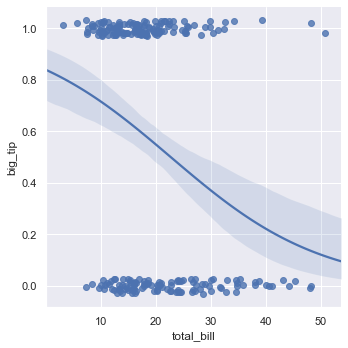

In [22]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

由于逻辑回归函数相较线性模型要复杂（逻辑回归还包含指数运算操作）， 稳健回归函数也较为复杂，因此它们的计算量都会被线性模型大，所以为了减少计算量，我们通常会取消置信区间,即设置`ci=None`。

> seaborn中会使用[自举法](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))(bootstrapping)，来计算置信区间。


---

另一种使用非参数回归拟合的方式——[局部加权回归散点平滑法](https://en.wikipedia.org/wiki/Local_regression)(locally weighted scatterplot smoothing，LOWESS),其主要思想是选取一定比例的局部数据，拟合多项式回归曲线，以便观察到数据的局部规律和趋势。

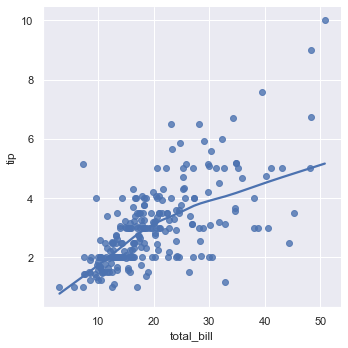

In [23]:
sns.lmplot(x='total_bill', y='tip', data=tips,
           lowess=True);


---

为了观察回归模型的效果，可以使用`residplot()`，绘制观察点与回归曲线上的预测点之间的残差图：

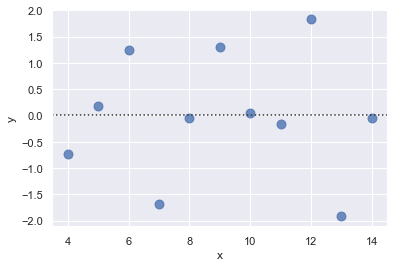

In [24]:
# 使用安斯库姆四重奏数据集中的线性数据
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'I'"),
              scatter_kws={'s': 80});

如果`residplot()`反应数据的残差分布具有结构性，那么这意味着我们当前选择的模型不是很适合：

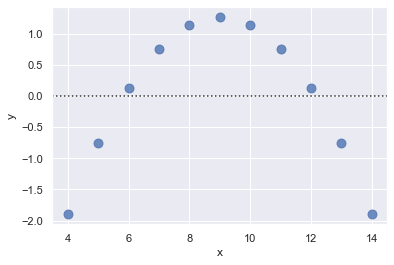

In [25]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
              scatter_kws={'s': 80});

---

### “第三者”插入

以上的内容，我们学习了如何探索两个变量之间的回归关系。现在来探究一个更有意思的问题：如果这两个变量都是关于第三个变量的函数，例如$x=f(z), y=g(z)$，那么我们改变$z$,$x,y$的关系会怎么改变呢？

那么这里就可以引入`regplot()`和`lmplot()`的差别了。`regplot()`函数只显示单一关系，而`lmplot()`将`regplot()`和`FacetGrid`结合，来提供一个基于`facet`的线性回归的接口，以此我们可以探索三个的分类变量的交互关系。

> 关于`FacetGrid`和`facet`，可以查看`seaborn_statistical.ipynb`中最后一小节的内容。

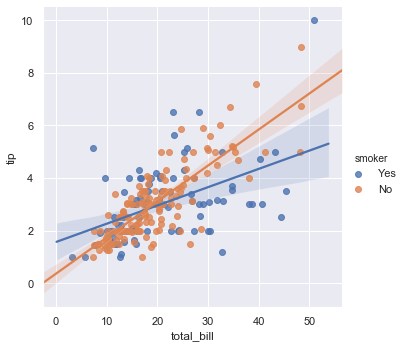

In [3]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips);

此例中，我们加入顾客是否吸烟这一信息，以此观察在以是否吸烟分类前提下，顾客总消费和小费之间的关系。

为了使得不同类别数据区分开，为念可以对散点图的属性进行修改：

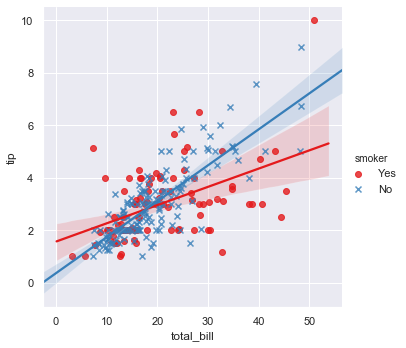

In [5]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips,
           markers=['o', 'x'], palette='Set1');

在上图中，我们设置调色板的样式为`Set1`，并且两个类别的散点样式分别为点状和叉状。

---

由于`lmplot()`基于`FacetGrid`，这允许我们显示不至三个变量的关系。我们加入顾客用餐时间的信息`time`:

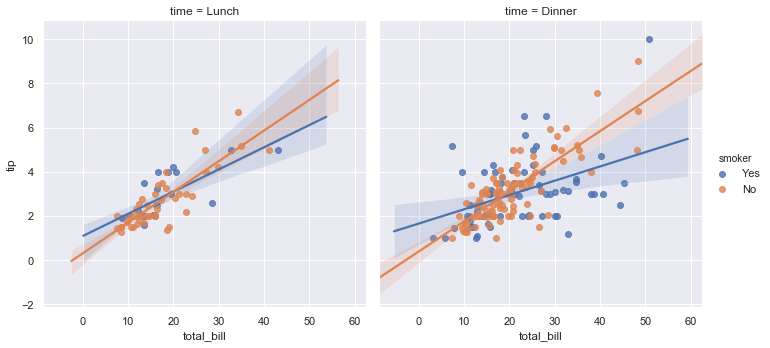

In [7]:
sns.lmplot(x='total_bill', y='tip', hue='smoker',
           col='time', data=tips);

我们再上图基础上，再加入性别信息：

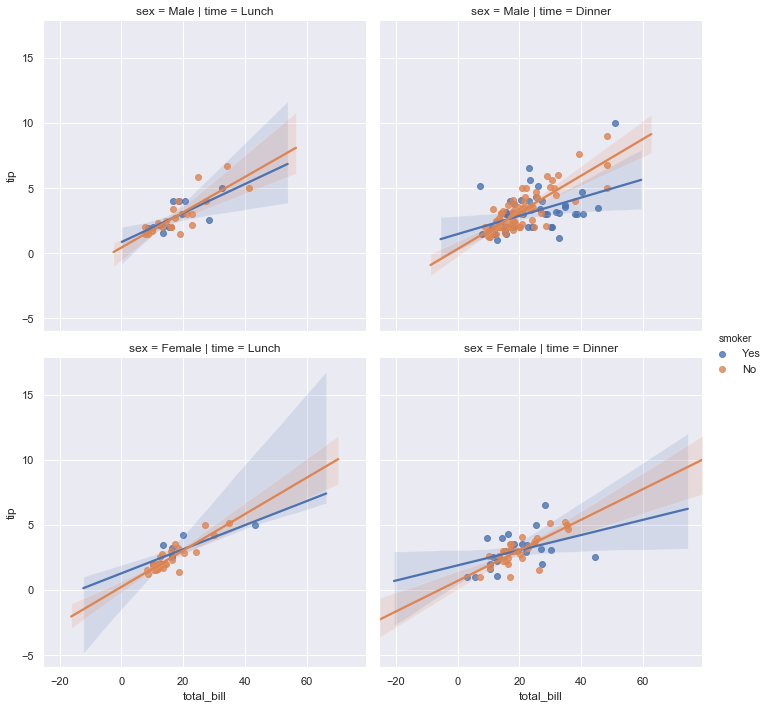

In [9]:
sns.lmplot(x='total_bill', y='tip', hue='smoker',
           col='time', row='sex', data=tips);

---

### 控制图像的大小与形状

在之前，我们使用相同的数据和属性打印出`lmplot()`和`regplot()`的图像，发现两者除了图像大小形状之外，其他基本相同。这是因为`regplot()`图像绘制在一根特殊的轴上。

> <cite>regplot() is an “axes-level” function draws onto a specific axes. </cite>

`regplot()`是一个"轴级"函数，这意味着我们可以绘制多个面板(panel)图像，并且精确控制回归图像的各种属性。
如果对`regplot()`函数没有显式指定选择的轴，则它会使用"current active" （ 不知如何翻译(￣▽￣)"） 的轴。

> "current active" axes 貌似是matplotlib中绘制图像函数使用的轴对象.

于是，我们可直接使用matplotlib中图像对象返回的轴，来作为绘制`regplot`的轴：


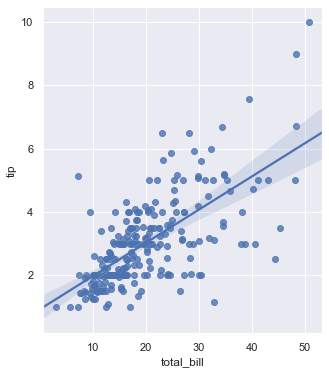

In [10]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax);

相比之下，`lmplot()`的图像属性完全由`FacetGrid`接口控制：

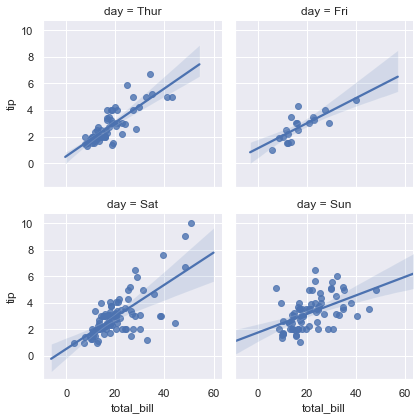

In [17]:
sns.lmplot(x='total_bill', y='tip', col='day', data=tips,
           col_wrap=2, height=3, aspect=1);

---

### 在其他函数中绘制回归曲线

除了显式调用`lmplot()`和`regplot()`函数，我们可以在其他绘图函数中设置`kind='reg'`参数来绘制回归曲线。

例如我们在联合分布函数`jointplot()`中绘制回归曲线：

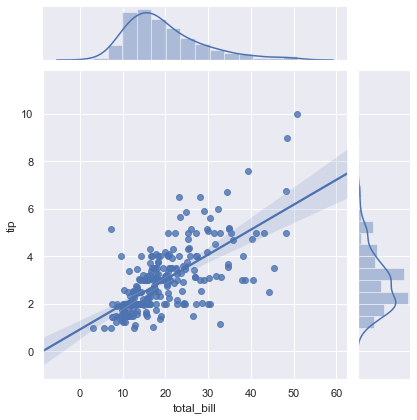

In [18]:
sns.jointplot(x='total_bill', y='tip', kind='reg', data=tips);

或者使用`pairplot()`，结合`PairGrid`来显示多个变量之间的线性关系：

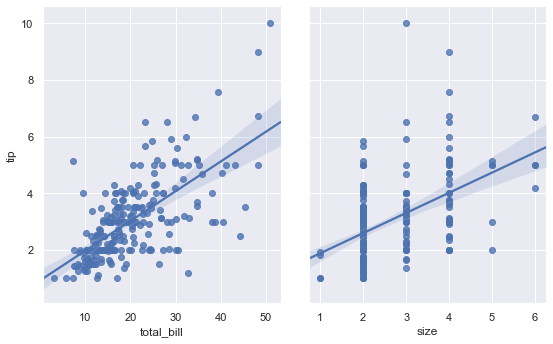

In [19]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             height=5, aspect=.8, kind='reg');

与`FacetGrid`不同，`PairGrid`将变量两两成对，即对`x_vars`中的变量与`y_vars`中的变量做笛卡尔乘积，获得变量间的配对，然后对每个配对，绘制其相应的关系图。

和`lmplot()`类似，如果我们希望增加第三个变量作为条件信息，则可以对`pairplot()`添加`hue`语义：

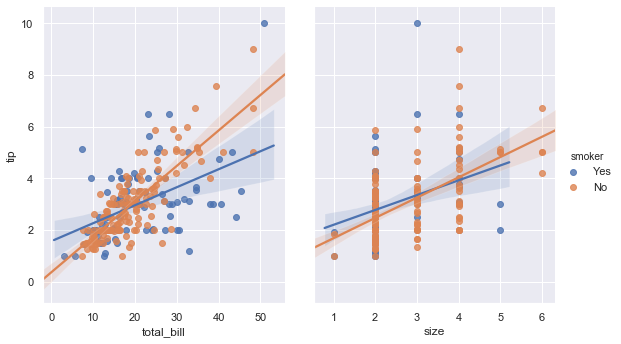

In [20]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             hue='smoker', height=5, aspect=.8, kind='reg');